# Optimised Python
In this notebook we will look at a few useful built in methods for getting the most out of our Python code.

In [1]:
import math
import numpy as np
from datetime import datetime
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
def cart2pol(x, y):
    r = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(r, phi)

To demonstrate Python's performance we will use a short function

As the name suggest `cart2pol` converts a pair of cartesian coordinates [x, y] to polar coordinates [r, phi].

In [3]:
from IPython.core.display import Image 
Image(url='https://upload.wikimedia.org/wikipedia/commons/thumb/7/78/Polar_to_cartesian.svg/1024px-Polar_to_cartesian.svg.png',width=400)

In [4]:
x = 3
y = 4
r, phi = cart2pol(x,y)

print('r   = ',r,'\nphi = ' ,phi)

r   =  5.0 
phi =  0.9272952180016122


What if we want to convert a list of cartesian coordinates to polar coordinates?

We could `loop` through both lists and perform the conversion for each x-y pair:

In [5]:
def cart2pol_list(list_x, list_y):
    # Prepare empty lists for r and phi values
    r = np.empty(len(list_x))
    phi = np.empty(len(list_x))
    
    # Loop through the lists of x and y, calculating the r and phi values
    for i in range(len(list_x)):
        r[i] = np.sqrt(list_x[i]**2 + list_y[i]**2)
        phi[i] = np.arctan2(list_y[i], list_x[i])
    
    return(r, phi)

In [6]:
# Create a range of x and y values
x_list = np.sin(np.arange(0,2*np.pi,0.1))
y_list = np.cos(np.arange(0,2*np.pi,0.1))

These coordinates make a circle centered at [0,0]:

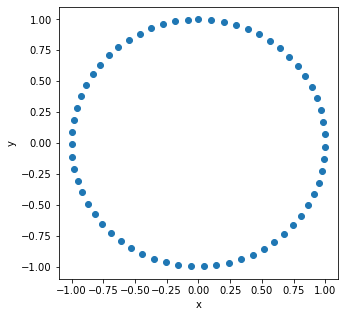

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.scatter(x_list,y_list)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [8]:
r_list, phi_list = cart2pol_list(x_list,y_list)
print(r_list)
print(phi_list)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[ 1.57079633  1.47079633  1.37079633  1.27079633  1.17079633  1.07079633
  0.97079633  0.87079633  0.77079633  0.67079633  0.57079633  0.47079633
  0.37079633  0.27079633  0.17079633  0.07079633 -0.02920367 -0.12920367
 -0.22920367 -0.32920367 -0.42920367 -0.52920367 -0.62920367 -0.72920367
 -0.82920367 -0.92920367 -1.02920367 -1.12920367 -1.22920367 -1.32920367
 -1.42920367 -1.52920367 -1.62920367 -1.72920367 -1.82920367 -1.92920367
 -2.02920367 -2.12920367 -2.22920367 -2.32920367 -2.42920367 -2.52920367
 -2.62920367 -2.72920367 -2.82920367 -2.92920367 -3.02920367 -3.12920367
  3.05398163  2.95398163  2.85398163  2.75398163  2.65398163  2.55398163
  2.45398163  2.35398163  2.25398163  2.15398163  2.05398163  1.95398163
  1.85398163  1.75398163  1.65398163]


This is a bit time consuming to type out though, surely there is a better way to make our functions work for lists of inputs? For that we can use numpy function `vectorise`.

```
Help on class vectorize in module numpy:

class vectorize(builtins.object)
 |  vectorize(pyfunc, otypes=None, doc=None, excluded=None, cache=False, signature=None)
 |  
 |  vectorize(pyfunc, otypes=None, doc=None, excluded=None, cache=False,
 |            signature=None)
 |  
 |  Generalized function class.
 |  
 |  Define a vectorized function which takes a nested sequence of objects or
 |  numpy arrays as inputs and returns a single numpy array or a tuple of numpy
 |  arrays. The vectorized function evaluates `pyfunc` over successive tuples
 |  of the input arrays like the python map function, except it uses the
 |  broadcasting rules of numpy.
 |  
 |  The data type of the output of `vectorized` is determined by calling
 |  the function with the first element of the input.  This can be avoided
 |  by specifying the `otypes` argument.

```

In [9]:
cart2pol_vec = np.vectorize(cart2pol)

In [10]:
r_list_vec, phi_list_vec = cart2pol_vec(x_list, y_list)

We can assure ourselves that these two methods produce the same answers:

In [11]:
print(r_list == r_list_vec)
print(phi_list == phi_list_vec)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]


Lastly, we could also have relied from the beginning on the fact that the numpy functions we used in our original cart2pol already accept lists and numpy arrays as input:

In [12]:
x_nparray = np.array(x_list)
y_nparray = np.array(y_list)
r, phi = cart2pol(x_nparray, y_nparray)

But how do they perform?

We can use Python's magic `%timeit` function to test this:

In [13]:
%timeit cart2pol_list(x_list, y_list)

351 µs ± 16.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [14]:
%timeit cart2pol_vec(x_list, y_list)

191 µs ± 17.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [15]:
%timeit cart2pol(x_list, y_list)

5.22 µs ± 98.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [16]:
%timeit cart2pol(x_nparray, y_nparray)

5.43 µs ± 316 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


From our experiments with `%timeit`, we learn the following:
- It was significantly faster, both for code writing and at runtime to use **vectorise** rather than manually looping through lists
- Using **numpy functions** directly on arrays was 1-2 orders of magnitude faster than either of the previous two
- It is more efficient to use **numpy arrays** than lists

## Multiprocessing
Another important consideration when code becomes computationally intensive is **multiprocessing**. Multiprocessing allows separate memory on your computer to run each process or program. Python normally runs on one core, so you won't feel the full benefit of your quad-core or greater machine. You can see this when you run a section of code. To demonstrate the effect of multiprocessing we'll need some more interesting maths:

In [17]:
def do_maths(start=0, num=10):
    pos = start
    big = 1000 * 1000
    ave = 0
    while pos < num:
        pos += 1
        val = math.sqrt((pos - big) * (pos - big))
        ave += val / num

    return int(ave)

In [18]:
t0 = datetime.now()

do_maths(num=30000000)

dt = datetime.now() - t0
print("Done in {:,.2f} sec.".format(dt.total_seconds()))

Done in 9.58 sec.


In [19]:
import multiprocessing

In [20]:
t0 = datetime.now()

pool = multiprocessing.Pool()
processor_count = multiprocessing.cpu_count()
# processor_count = 2 # we can Python to use a specific number of cores if desired

print(f"Computing with {processor_count} processor(s).")
tasks = []
for n in range(1, processor_count + 1):
    task = pool.apply_async(do_maths, (30000000 * (n - 1) / processor_count,
                                      30000000 * n / processor_count))
    
    tasks.append(task)

pool.close()
pool.join()

dt = datetime.now() - t0
print("Done in {:,.2f} sec.".format(dt.total_seconds()))


Computing with 8 processor(s).
Done in 2.62 sec.


Note that you can recover results stored in the task list with get(). This list will be in the same order as that which you used to spawn the processes:

In [ ]:
for t in tasks:
    print(t.get())

The structure of a multiproccess call is:

```python
pool = multiprocessing.Pool() # Make a pool ready to recieve tasks
results = [] # empty list for results
for n in range(1, processor_count + 1): # Loop for assigning a number of tasks
    result = pool.appy_async(function, (arguments)) # make a task by passing it a function and arguments
    results.append(result) # when result(s) of this task are ready, append them to the list

pool.close() # tell async there are no more tasks coming
pool.join() # start running the tasks concurrently

for t in results:
    t.get() # retrieve your results, You could print or assign each result to a variable for later analysis
```

## Why can't we multithread in Python?

If you have experience of other programming languages, you may wonder why we can't assign tasks to multiple threads to speed up execution (multithreading means sharing the same memory by multiple processes).

We are prevented from doing this by the Global Interpreter Lock (GIL). This is a lock on the interpreter which ensures that only one thread can be in a state of execution at any one time. This is essential to protect Python's reference system that keeps track of all of the objects in memory. 

To get around this lock we spawn several processes which each have their own instance of the interpreter and allocated memory so cannot block one another or cause mischief with references. There's a great summary of the GIL on the [Real Python website](https://realpython.com/python-gil/).

In conclusion, multithreading won't speed up your compute heavy calcualtions as only one thread can execute at any time. Use multiprocessing instead.

## References

Multiprocessing example adapted from [Talk Python To Me Training: async techniques](https://training.talkpython.fm/courses/details/async-in-python-with-threading-and-multiprocessing).